In [24]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
hoops_df = pd.read_csv('Resources/cbb.csv')
hoops_df

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,Michigan St.,B10,35,26,111.4,87.8,0.9392,50.6,44.5,20.8,...,32.4,50.4,44.3,34.1,30.1,64.4,6.7,S16,3.0,2013
2451,Arizona,P12,35,27,114.4,92.2,0.9229,52.5,46.6,19.5,...,32.9,50.6,43.4,37.1,35.8,66.8,4.6,S16,6.0,2013
2452,Oregon,P12,37,28,104.8,88.6,0.8728,49.3,46.4,21.4,...,33.3,49.1,44.9,33.3,33.4,69.2,2.9,S16,12.0,2013
2453,La Salle,A10,34,24,112.0,96.2,0.8516,51.9,49.3,17.1,...,28.5,49.3,50.6,37.7,30.2,66.0,0.3,S16,13.0,2013


In [26]:
hoops_df = hoops_df.drop(["G","TEAM","SEED","CONF","YEAR"], axis=1)
hoops_df

,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON
0,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND
1,36,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND
2,33,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND
3,31,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND
4,37,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,26,111.4,87.8,0.9392,50.6,44.5,20.8,19.2,36.1,27.6,36.6,32.4,50.4,44.3,34.1,30.1,64.4,6.7,S16
2451,27,114.4,92.2,0.9229,52.5,46.6,19.5,19.8,35.0,26.7,37.4,32.9,50.6,43.4,37.1,35.8,66.8,4.6,S16
2452,28,104.8,88.6,0.8728,49.3,46.4,21.4,22.0,35.8,27.2,38.4,33.3,49.1,44.9,33.3,33.4,69.2,2.9,S16
2453,24,112.0,96.2,0.8516,51.9,49.3,17.1,21.3,29.0,34.2,31.3,28.5,49.3,50.6,37.7,30.2,66.0,0.3,S16


In [27]:
hoops_df = hoops_df.dropna(subset=['POSTSEASON'])

In [28]:
class_count = hoops_df['POSTSEASON'].value_counts()
class_count

R64          224
R32          112
S16           56
E8            28
R68           28
F4            14
2ND            7
Champions      7
Name: POSTSEASON, dtype: int64

In [29]:
classifications_to_replace = list(class_count.index)

In [30]:
for cls in classifications_to_replace:
    if cls == "R68":
        hoops_df['POSTSEASON'] = hoops_df['POSTSEASON'].replace(cls,"8")
    elif cls == "R64":
        hoops_df['POSTSEASON'] = hoops_df['POSTSEASON'].replace(cls,"7")
    elif cls == "R32":
        hoops_df['POSTSEASON'] = hoops_df['POSTSEASON'].replace(cls,"6")
    elif cls == "S16":
        hoops_df['POSTSEASON'] = hoops_df['POSTSEASON'].replace(cls,"5")
    elif cls == "E8":
        hoops_df['POSTSEASON'] = hoops_df['POSTSEASON'].replace(cls,"4")
    elif cls == "F4":
        hoops_df['POSTSEASON'] = hoops_df['POSTSEASON'].replace(cls,"3")
    elif cls == "2ND":
        hoops_df['POSTSEASON'] = hoops_df['POSTSEASON'].replace(cls,"2")
    elif cls == "Champions":
        hoops_df['POSTSEASON'] = hoops_df['POSTSEASON'].replace(cls,"1")

hoops_df['POSTSEASON'].value_counts()

/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

7    224
6    112
5     56
4     28
8     28
3     14
2      7
1      7
Name: POSTSEASON, dtype: int64

In [31]:
hoops_df['POSTSEASON'] = pd.to_numeric(hoops_df['POSTSEASON'], downcast='signed')

/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
hoops_df.dtypes

W               int64
ADJOE         float64
ADJDE         float64
BARTHAG       float64
EFG_O         float64
EFG_D         float64
TOR           float64
TORD          float64
ORB           float64
DRB           float64
FTR           float64
FTRD          float64
2P_O          float64
2P_D          float64
3P_O          float64
3P_D          float64
ADJ_T         float64
WAB           float64
POSTSEASON       int8
dtype: object

In [33]:
hoops_df

,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON
0,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2
1,36,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2
2,33,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2
3,31,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2
4,37,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,26,111.4,87.8,0.9392,50.6,44.5,20.8,19.2,36.1,27.6,36.6,32.4,50.4,44.3,34.1,30.1,64.4,6.7,5
2451,27,114.4,92.2,0.9229,52.5,46.6,19.5,19.8,35.0,26.7,37.4,32.9,50.6,43.4,37.1,35.8,66.8,4.6,5
2452,28,104.8,88.6,0.8728,49.3,46.4,21.4,22.0,35.8,27.2,38.4,33.3,49.1,44.9,33.3,33.4,69.2,2.9,5
2453,24,112.0,96.2,0.8516,51.9,49.3,17.1,21.3,29.0,34.2,31.3,28.5,49.3,50.6,37.7,30.2,66.0,0.3,5


In [34]:
y = hoops_df['POSTSEASON'].values
X = hoops_df.drop(['POSTSEASON'], 1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47)

/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [6]:
y

array(['2ND', '2ND', '2ND', ..., 'S16', 'S16', 'S16'], dtype=object)

In [35]:
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.395
k: 3, Train/Test Score: 0.627/0.361
k: 5, Train/Test Score: 0.583/0.521
k: 7, Train/Test Score: 0.580/0.462
k: 9, Train/Test Score: 0.557/0.437
k: 11, Train/Test Score: 0.552/0.437
k: 13, Train/Test Score: 0.552/0.437
k: 15, Train/Test Score: 0.557/0.445
k: 17, Train/Test Score: 0.555/0.437
k: 19, Train/Test Score: 0.555/0.420


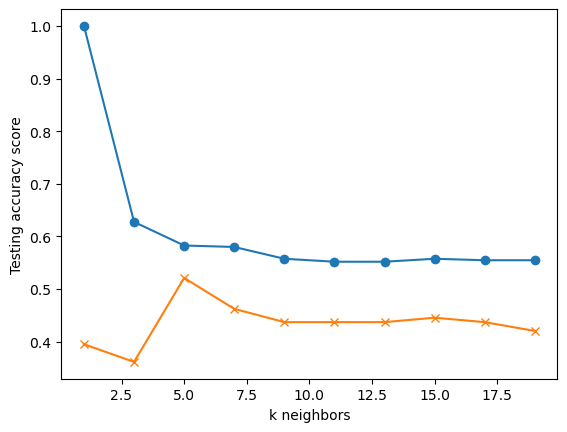

In [36]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

In [37]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=5 Test Acc: 0.521


In [38]:
y_true = y_test
y_pred = knn.predict(X_test_scaled)

In [39]:
confusion_matrix(y_true, y_pred)

array([[ 1,  0,  1,  0,  0,  1,  0,  0],
       [ 0,  0,  1,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  1,  1,  0,  2,  1,  0],
       [ 0,  0,  0,  1,  7,  5,  6,  0],
       [ 0,  0,  0,  2,  4, 11, 10,  0],
       [ 0,  0,  0,  0,  3,  8, 42,  0],
       [ 0,  0,  0,  0,  0,  0,  8,  0]])

In [40]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.33      0.33      0.33         3
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         0
           4       0.25      0.14      0.18         7
           5       0.50      0.37      0.42        19
           6       0.39      0.41      0.40        27
           7       0.63      0.79      0.70        53
           8       0.00      0.00      0.00         8

    accuracy                           0.52       119
   macro avg       0.26      0.26      0.25       119
weighted avg       0.47      0.52      0.49       119



/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

In [41]:
knn.predict(X_test_scaled[0:10])

array([7, 7, 5, 6, 7, 5, 7, 6, 7, 7], dtype=int8)

In [42]:
knn.predict_proba(X_test_scaled[0:10])

array([[0. , 0. , 0. , 0. , 0.2, 0.2, 0.6, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0.2, 0.2, 0.4, 0.2, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.4, 0.4, 0.2],
       [0. , 0. , 0. , 0.2, 0.2, 0.2, 0.4, 0. ],
       [0. , 0. , 0.2, 0.2, 0.4, 0.2, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.2, 0.2, 0.6, 0. ],
       [0. , 0. , 0. , 0. , 0.4, 0.6, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.4, 0.6, 0. ],
       [0. , 0. , 0. , 0.2, 0. , 0.2, 0.6, 0. ]])

In [46]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=47, n_estimators=100).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.48739495798319327


[0.07428531 0.07103723 0.06540783 0.1125905  0.04582739 0.03787091
 0.04684374 0.05011972 0.05193264 0.04808381 0.04587994 0.04685405
 0.04474699 0.04551387 0.04625783 0.04828418 0.04582793 0.07263614]


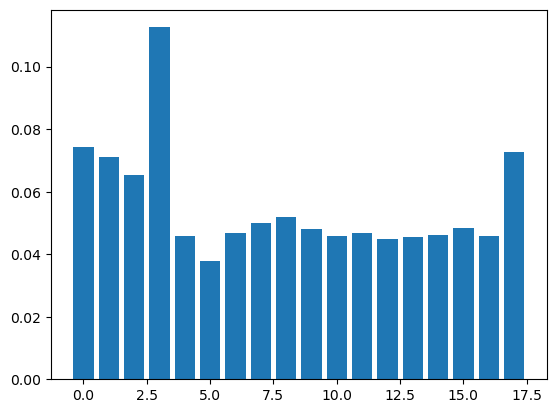

In [47]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [48]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=47))

In [49]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=47)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [50]:
X_train_scaled[0]

array([-0.87413024, -0.43855411, -0.19599718,  0.11223914, -0.87437569,
        0.50078608,  1.06564147, -0.62815746,  0.93074812, -1.20610316,
        0.05935908,  0.43399427, -0.56929985,  0.44547109, -0.88106216,
        0.40023991,  0.35707262,  0.23056262])

In [51]:
X_selected_train_scaled[0]

array([-0.87413024, -0.43855411, -0.19599718,  0.11223914,  0.23056262])

In [52]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression()
clf2.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf2.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf2.score(X_selected_test_scaled, y_test)}')

Training Score: 0.5602240896358543
Testing Score: 0.48739495798319327


In [53]:
from sklearn.metrics import confusion_matrix, classification_report
y_true = y_test
y_pred = clf2.predict(X_selected_test_scaled)
confusion_matrix(y_true, y_pred)

array([[ 0,  0,  2,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  2,  0,  2,  1,  0],
       [ 0,  0,  1,  0,  1, 14,  3,  0],
       [ 0,  0,  0,  0,  0,  9, 18,  0],
       [ 0,  0,  0,  0,  2,  6, 45,  0],
       [ 0,  0,  0,  0,  0,  0,  7,  1]])

In [54]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         0
           4       1.00      0.29      0.44         7
           5       0.25      0.05      0.09        19
           6       0.27      0.33      0.30        27
           7       0.61      0.85      0.71        53
           8       1.00      0.12      0.22         8

    accuracy                           0.49       119
   macro avg       0.39      0.21      0.22       119
weighted avg       0.50      0.49      0.44       119



/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

In [55]:
clf2.predict_proba(X_selected_test_scaled[0:10])

array([[6.57098233e-05, 2.52007228e-04, 4.82047770e-03, 2.38073148e-02,
        7.31481736e-02, 2.83716335e-01, 5.76296822e-01, 3.78931605e-02],
       [2.93323295e-06, 3.01507565e-05, 1.02907925e-03, 6.38326905e-04,
        2.25637053e-03, 7.93050537e-02, 8.54613805e-01, 6.21242805e-02],
       [1.70183879e-02, 8.81613364e-03, 3.86382315e-02, 1.51470291e-01,
        2.87490269e-01, 3.14542325e-01, 1.62529113e-01, 1.94952484e-02],
       [1.42945544e-04, 9.63918298e-04, 1.66660559e-02, 2.67267302e-02,
        8.69462907e-02, 3.64707822e-01, 4.81256370e-01, 2.25898665e-02],
       [1.33163581e-05, 2.07622437e-04, 6.50297721e-03, 1.51297470e-02,
        6.08285983e-02, 3.11832409e-01, 5.81086162e-01, 2.43991676e-02],
       [3.65959949e-03, 1.50575764e-02, 9.38776308e-02, 1.16078517e-01,
        1.89586290e-01, 4.30336922e-01, 1.47774099e-01, 3.62936530e-03],
       [1.09063772e-05, 1.54503736e-04, 5.44275846e-03, 1.43316301e-02,
        7.15488353e-02, 2.91905203e-01, 5.79589138e-01, 3.

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [20]:
classifier.fit(X_train_scaled, y_train)

/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [21]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.6442577030812325
Testing Data Score: 0.5210084033613446


In [22]:
y_true = y_test
y_pred = classifier.predict(X_test_scaled)
confusion_matrix(y_true, y_pred)

array([[ 0,  1,  2,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  1,  0,  2,  3,  0,  0],
       [ 0,  0,  1,  1,  1, 12,  4,  0],
       [ 0,  0,  0,  0,  0, 14, 13,  0],
       [ 0,  0,  1,  0,  0,  8, 44,  0],
       [ 0,  0,  0,  0,  0,  0,  5,  3]])

In [23]:
confusion_matrix(y, classifier.predict(X))

array([[  7,   0,   0,   0,   0,   0,   0,   0],
       [  7,   0,   0,   0,   0,   0,   0,   0],
       [ 14,   0,   0,   0,   0,   0,   0,   0],
       [ 28,   0,   0,   0,   0,   0,   0,   0],
       [ 56,   0,   0,   0,   0,   0,   0,   0],
       [112,   0,   0,   0,   0,   0,   0,   0],
       [222,   0,   0,   0,   0,   0,   0,   2],
       [ 26,   0,   0,   0,   0,   0,   0,   2]])

In [24]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         7
           5       0.20      0.05      0.08        19
           6       0.38      0.52      0.44        27
           7       0.67      0.83      0.74        53
           8       1.00      0.38      0.55         8

    accuracy                           0.52       119
   macro avg       0.28      0.22      0.23       119
weighted avg       0.48      0.52      0.48       119



/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi